In [1]:
# allow to reload module
import importlib

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import beaf.read_file as br

#import spikeinterface.extractors as se
#import spikeinterface.sorters as ss
#import spikeinterface.widgets as sw


In [59]:
Info = br.get_brw_experiment_setting("../recordings/5s_rec_raw.brw")
print(Info.get_mea_model())
print(Info.get_recording_type())
print(Info.get_nb_channel())
print(Info.get_sampling_rate())
print(Info.get_recording_length())
print(Info.get_recording_length_sec())

AccuraV2
RawDataSettings
4096
19753.775390625
98769
5.0


In [61]:
File = br.read_brw_file("../recordings/5s_rec_raw.brw", t_start = 0, t_end = "all", ch_to_extract=[125, 2476], frame_chunk = 10000, verbose=True)

Reading chunk 1 out of 1
done


AccuraV2
RawDataSettings
4096
19753.775390625
<Closed HDF5 file>
(2, 3)
(98769,)
[[0, 98768]]


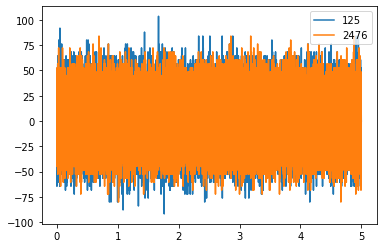

In [64]:
print(File)

print(File.info.get_mea_model())
print(File.info.get_recording_type())
print(File.info.get_nb_channel())
print(File.info.get_sampling_rate())

print(File.data)

print(np.shape(File.recording))
print(np.shape(File.recording[0][1]))
# time windows of the recording, in frames
print(File.recording[0][2])

plt.plot([x/File.info.get_sampling_rate() for x in range(0, len(File.recording[0][1]))], File.recording[0][1], label=File.recording[0][0])
plt.plot([x/File.info.get_sampling_rate() for x in range(0, len(File.recording[1][1]))], File.recording[1][1], label=File.recording[1][0])

# plt.ylim((-500, 500))
plt.legend()
plt.show()

In [ ]:
recordings = []
times = [[0.1, 0.5], [2.5, 3.2], [1.8, 3.2]]
channels = [[125, 126], [247], [3015, 3016, 1877]]
for snippet in range(0, 3):
    File = br.read_brw_file("../recordings/5s_rec_raw.brw", t_start = times[snippet][0], t_end = times[snippet][1], ch_to_extract=channels[snippet])
    recordings.append(File.recording)
    del(File)

print(np.shape(recordings))
print(np.shape(recordings[2]))
print(np.shape(recordings[2][0][1]))

In [ ]:
import timeit
chunks = [1, 10, 100, 1000, 10000, 100000]
for chunk in chunks:
    start = timeit.default_timer()
    File = br.read_brw_file("../recordings/5s_rec_raw.brw", t_start = 0, t_end = "all", ch_to_extract=[125], frame_chunk = chunk)
    stop = timeit.default_timer()
    print("runtime for chunk", chunk, ":", stop - start)

In [70]:
Info = br.get_brw_experiment_setting("../recordings/5s_rec_raw-compressed.brw")
print(Info.get_mea_model())
print(Info.get_recording_type())
print(Info.get_nb_channel())
print(Info.get_sampling_rate())
print(Info.get_recording_length())
print(Info.get_recording_length_sec())

AccuraV2
NoiseBlankingCompressionSettings
4096
19753.775390625
98769
5.0


In [76]:
File = br.read_brw_file("../recordings/cerebellum-slice1-01.brw", t_start = 0.5, t_end = 1.5, ch_to_extract=[1885, 1886, 1893, 1894, 1895])

2 data chunks to read


In [68]:
import timeit
start = timeit.default_timer()
File = br.read_brw_file("../recordings/cerebellum-slice1-01.brw", t_start = 0, t_end = "all", ch_to_extract="all")
print("runtime:", timeit.default_timer() - start)

49 data chunks to read
runtime: 30.975123000000167


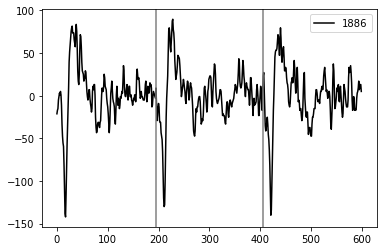

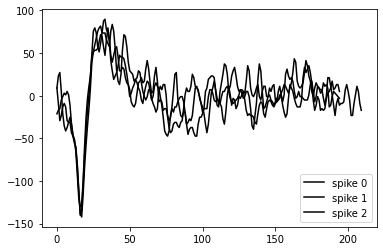

In [78]:
# for i in range(0, len(File.recording)):
#     plt.plot(File.recording[i][1], label=File.recording[i][0], c='black')
#     plt.legend()
#     plt.show()

plt.plot(File.recording[1][1], label=File.recording[1][0], c='black')
snip_stop = 0
for snip in range(0, len(File.recording[1][2])-1):
    snip_start = snip_stop
    snip_stop = snip_start + File.recording[1][2][snip][1] - File.recording[1][2][snip][0]
    plt.axvline(snip_stop, c='grey')
plt.legend()
plt.show()

snip_stop = 0
for snip in range(0, len(File.recording[1][2])):
    snip_start = snip_stop
    snip_stop = snip_start + File.recording[1][2][snip][1] - File.recording[1][2][snip][0]
    plt.plot(File.recording[1][1][snip_start:snip_stop], label="spike "+ str(snip), c='black')
plt.legend()
plt.show()


In [ ]:
# ---- C code integration tests ---- #


# import struct
# print("Current Python version is %s-bits" %(struct.calcsize("P")*8))

# compile c code:
# cl /LD /EHsc c_lib.cpp 

import ctypes

c_lib = ctypes.CDLL("../beaf/c_lib/c_lib.dll")

c_lib.test_add_int.restype = ctypes.c_long
print(c_lib.test_add_int(1, 2))

c_lib.test_bool.restype = ctypes.c_bool
print(c_lib.test_bool(True))

c_lib.test_char.argtypes = [ctypes.c_char_p]
string = b"Ook"
c_lib.test_char.restype = ctypes.c_char_p
print(c_lib.test_char(string))

c_lib.test_string.restype = ctypes.c_char_p
print(c_lib.test_string())


c_lib.fill_array.argtypes = ctypes.POINTER(ctypes.c_int), ctypes.c_int
c_lib.fill_array.restype = None
array_length = 5
p = (ctypes.c_int * array_length)()
c_lib.fill_array(p, len(p))
print(list(p))

c_int_p = ctypes.POINTER(ctypes.c_int)
c_lib.test_pointer_int.restype = c_int_p
pointer = c_lib.test_pointer_int(200)
print(pointer)
print(ctypes.cast(c_lib.test_pointer_int, ctypes.py_object).value)


# addr = ctypes.addressof(pointer.contents)
# print(addr)
# np.frombuffer(ctypes.POINTER(ctypes.c_int).from_address(addr))


# c_int_p = ctypes.POINTER(ctypes.c_int)
# c_lib.test_pointer_int.restype = c_void_p
# print(c_lib.test_pointer_int(200).value)


# c_lib.test_char.argtypes = [ctypes.c_int, ctypes.c_int]
# c_lib.test_array_int.restype = ctypes.c_int * 2
# c_lib.test_array_int.restype = ctypes.POINTER(ctypes.c_int)
# print(c_lib.test_array_int(1, 2))
# print(c_lib.test_array_int(1, 2)[0], ";",  c_lib.test_array_int(1, 2)[1])

# import numpy as np
# np.ctypeslib.as_array(ctypes.POINTER(ctypes.c_int).from_address(ctypes.addressof(c_lib.test_array_int(1, 2))), shape=(2, 0))

# from numpy.ctypeslib import ndpointer
# c_lib.test_array_int.restype = ndpointer(dtype=ctypes.c_int, shape=(2,))
# print(c_lib.test_array_int(1, 2))

# ArrayType = ctypes.c_int*2
# addr = ctypes.addressof(c_lib.test_array_int(1, 2).contents)
# a = np.frombuffer(ArrayType.from_address(addr))

# array_pointer = ctypes.cast(c_lib.test_array_int(1, 2), ctypes.POINTER(ctypes.c_int*2))
# a = np.frombuffer(array_pointer.contents)
# print(a)

# print(ctypes.cast(c_lib.test_array_int(1, 2), ctypes.POINTER(ctypes.c_int)))
# print(ctypes.pointer(ctypes.cast(c_lib.test_array_int(1, 2), ctypes.POINTER(ctypes.c_int))))


# c_lib.test_vector_int.restype = ctypes.c_int * 2
# array2 = c_lib.test_vector_int(1, 2)
# print(array2[0], ";", array2[1])

# c_lib.test_char.argtypes = [ctypes.c_double, ctypes.c_double]
# c_lib.test_array_double.restype = ctypes.POINTER(ctypes.c_double)
# array3 = c_lib.test_array_double(1.0, 2.0)
# print(array3[0], ";", array3[1])
